# Import Libraries and Data

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
df = pd.read_csv(r'/Users/aaronreese/Desktop/Boat Data Project/2. Data/Prepared Data/boat_data_final.csv')

# Clean Data

In [20]:
df.head()

,GBP Price,USD Price,Manufacturer,Condition,Fuel,Year Built,Length (Meters),Width (Meters),Material,Country Sold In,Number of views last 7 days
0,2969.93,3712.41,Rigiflex power boats,NEW,NaN,2017.0,4.00,1.90,NaN,Switzerland,226
1,2966.50,3708.13,Terhi power boats,NEW,NaN,2020.0,4.00,1.50,Thermoplastic,Germany,75
2,3355.30,4194.13,Marine power boats,NEW,NaN,NaN,3.69,1.42,Aluminium,Switzerland,124
3,2849.00,3561.25,Pioner power boats,NEW,NaN,2020.0,3.00,1.00,NaN,Denmark,64
4,2889.15,3611.44,Linder power boats,NEW,NaN,2019.0,3.55,1.46,Aluminium,Germany,58


In [21]:
df_dups = df[df.duplicated()]

In [22]:
df_dups

,GBP Price,USD Price,Manufacturer,Condition,Fuel,Year Built,Length (Meters),Width (Meters),Material,Country Sold In,Number of views last 7 days


In [23]:
df.isnull().sum()

GBP Price                         0
USD Price                         0
Manufacturer                   1338
Condition                        86
Fuel                           2228
Year Built                      551
Length (Meters)                   9
Width (Meters)                   56
Material                       1749
Country Sold In                  38
Number of views last 7 days       0
dtype: int64

In [24]:
df['Length (Meters)'].fillna(df['Length (Meters)'].median(), inplace=True)
df['Width (Meters)'].fillna(df['Width (Meters)'].median(), inplace=True)

# Scatterplots

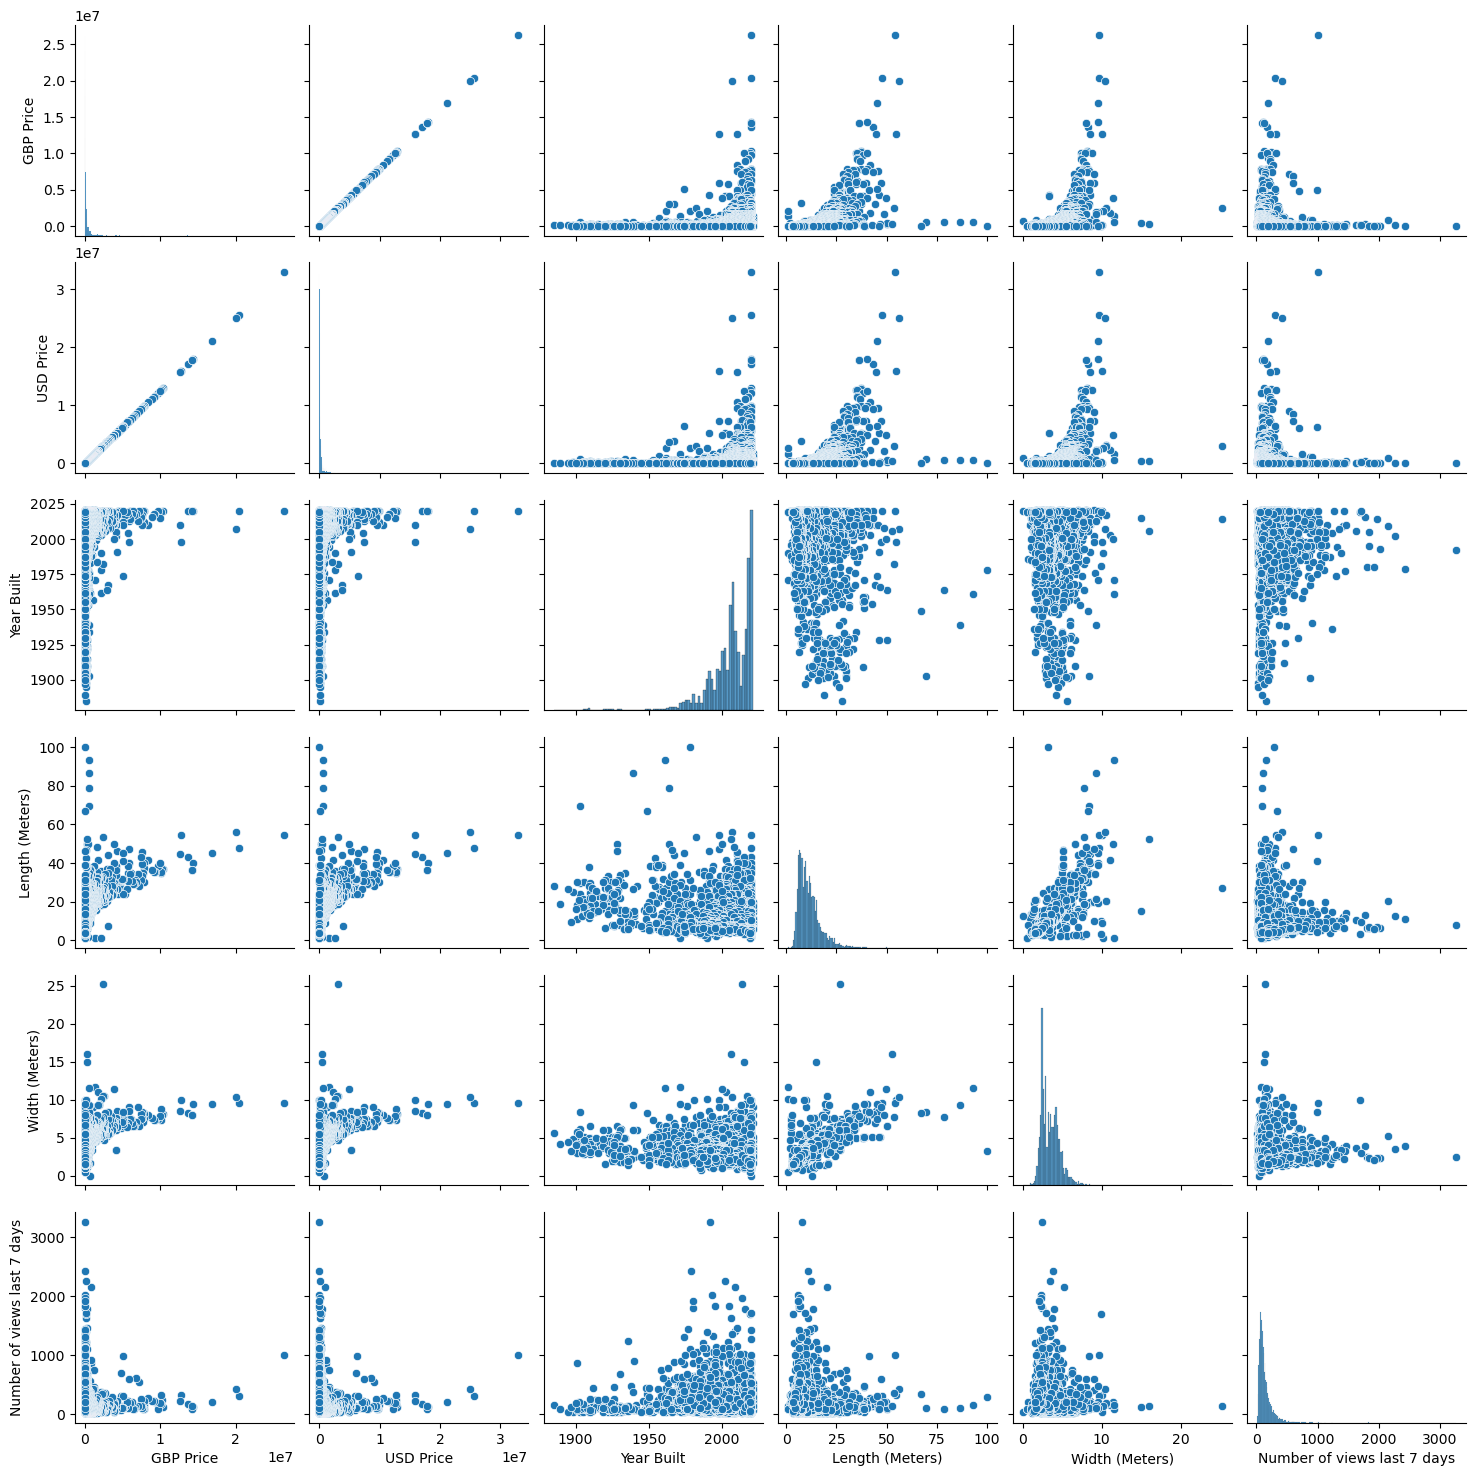

In [25]:
g = sns.pairplot(df)

### Hypothesis

In [26]:
# Boat price is directly proportional to length.

# Reshape Variables

In [27]:
X = df['Length (Meters)'].values.reshape(-1,1)
y = df['USD Price'].values.reshape(-1,1)

In [28]:
X

array([[4.  ],
       [4.  ],
       [3.69],
       ...,
       [4.4 ],
       [4.37],
       [3.6 ]])

In [29]:
y

array([[3712.41],
       [3708.13],
       [4194.13],
       ...,
       [4780.19],
       [4568.75],
       [4205.25]])

# Split Data into Training and Test Set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

# Linear Regression

In [31]:
regression = LinearRegression()

In [32]:
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
y_predicted = regression.predict(X_test)

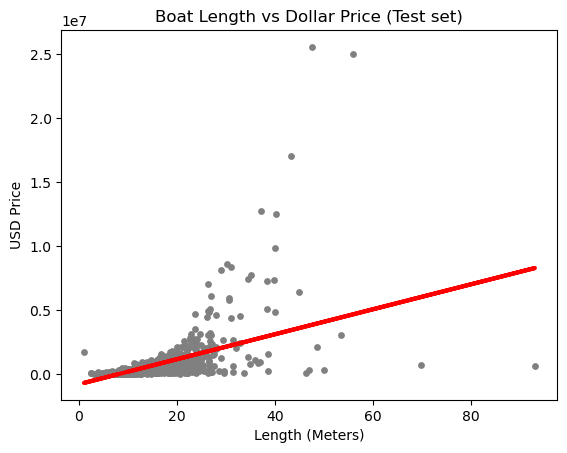

In [36]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boat Length vs Dollar Price (Test set)')
plot_test.xlabel('Length (Meters)')
plot_test.ylabel('USD Price')
plot_test.show()

In [37]:
# The line does not fit the test set well.  
# After about the 20-30 meter mark, plot points vary much more with some noteable extremes.
# Due to these reasons, the line doesn't serve much purpose beyond 20-30 meters.

# MSE and R2 Score

In [38]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[97624.82626478]]
Mean squared error:  728169925535.813
R2 score:  0.309730024447017


# Predicted Y Values vs Actual Y Values

In [40]:
y_predicted

array([[ 203694.20296236],
       [ 550262.33620234],
       [1023742.74358655],
       ...,
       [-343004.82412044],
       [-216092.54997622],
       [ -59892.82795256]])

In [41]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()}) 
df2.head(30)

,Actual,Predicted
0,16893.75,2.036942e+05
1,370812.50,5.502623e+05
2,1422687.50,1.023743e+06
3,94562.50,4.672812e+05
4,361207.50,3.179152e+05
5,397906.25,1.248280e+06
6,134778.26,-7.746530e+04
7,44625.00,1.610813e+03
8,488750.00,1.222897e+06
9,79581.25,1.610813e+03


# Reflections

In [42]:
# I believe the model performed very poorly for this test set.
# Values were far too varied in the scatterplot to perform a meanginful analysis.
# Additionally, the predicted and actual Y values are drastically different by very large amounts.

In [43]:
# Inconsistent data collection systems were most likely the result of such heavy impacts on the data.
# There was a lack of a basic uniform system for the raw data set.
# This could have caused a lot of values to be missing, incorrect, or in the wrong measurement when recorded.